# Credit Card Approval Prediction

## Introduction:

A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.

Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.

## Question & Answers:

Q1.  Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?
Ans. Banks face major losses due to high NPA (Non Performing Assets) rates i.e overdue customer loans. Thus our model is usefull to predict whether the customer will be able to return the loan amount or not. This will help banks to lend Credit Cards to specific customers and reduce their losses.

Q2.  How is it going to impact the banking sector?
Ans. This Credit Card approval system will have a huge impact on the banking sector where only eligible customers will get Credit Card servies, they can collect more interest which will help bank to provide loans to the customers, reducing bank's NPA rates.

Q3.  If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in        India.
Ans. A bad quality of data or missing data can prove to be a problem for such models which can lead to lower accuracy and       incorrect predictions, yet various other parameters for which customers aren't responsible can prove to be a potential gap between reality and model's predictions.

## Initial Hypothesis:

Prediction Hypothesis: We can predict credit card approval using applicant data and machine learning.

Benefits of Prediction: Prediction benefits include improved risk management, faster decisions, reduced defaults, and increased profitability.

Financial Strength Hypothesis: Higher income and stable employment favor credit card approval, indicating a stronger financial profile.

Contact Information: Contact details are collected but are not primary factors for approval; financial stability and credit history matter more.

Family Size & Marital Status Effect: Family size and marital status may influence credit card approval, especially for larger families and married individuals.

Housing & Property Ownership Hypothesis: Housing type and property ownership impact approval, favoring those with stable housing and property ownership.

## Importing Libraries

In [9]:
# Warning is used to supress the display of warnings
import warnings
warnings.filterwarnings("ignore")

# Numpy is used for Mathematical operations
import numpy as np

# Pandas is used for Data manipulaiton and analysis
import pandas as pd

# Matplotlib, Plotly and seaborn is used for visualization
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as po
import seaborn as sns

# To encode the variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Model Selection used for splitting the dataset into train and test
from sklearn.model_selection import train_test_split

# StandardScaler used to Standardize the all the variables
from sklearn.preprocessing import StandardScaler

# Scikit - Learn features various Models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV #Hyperparameter Tuning

In [12]:
DB1 = pd.read_csv("Credit_card.csv")
DB2 = pd.read_csv("Credit_card_label.csv")

In [13]:
DB1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [14]:
DB2.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [16]:
#Merging Dataset
Credit = pd.merge(DB1, DB2, on='Ind_ID', how='outer')
Credit.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [17]:
#Copying Data For safety purpose
Credit_card = Credit.copy()

In [18]:
Credit_card.shape

(1548, 19)

In [19]:
Credit_card.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [20]:
Credit_card.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [21]:
Credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [22]:
## It's noted that the variables "Mobile_phone," "Work_Phone," "Phone," and "EMAIL_ID" are present in the dataset but 
## are deemed unnecessary for the analysis.

Credit_card.drop(columns=['Mobile_phone','Work_Phone','Phone','EMAIL_ID'], inplace=True, axis=1)

In [23]:
Credit_card.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Type_Occupation',
       'Family_Members', 'label'],
      dtype='object')

In [25]:
Credit_card.duplicated().sum()

0

In [26]:
Credit_card.nunique() # To identify the number of unique values present in each variables

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [27]:
Credit_card.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ind_ID,1548.0,NaN,NaN,NaN,5078920.351421,41717.587742,5008827.0,5045069.75,5078841.5,5115673.0,5150412.0
GENDER,1541,2,F,973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Car_Owner,1548,2,N,924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Propert_Owner,1548,2,Y,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHILDREN,1548.0,NaN,NaN,NaN,0.412791,0.776691,0.0,0.0,0.0,1.0,14.0
Annual_income,1525.0,NaN,NaN,NaN,191399.32623,113252.997656,33750.0,121500.0,166500.0,225000.0,1575000.0
Type_Income,1548,4,Working,798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,1548,5,Secondary / secondary special,1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1548,5,Married,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Housing_type,1548,6,House / apartment,1380,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
for column in Credit_card.columns: # Creating a loop to view all the values present inside each variables
    unique_values = Credit_card[column].unique()
    print(column)
    print(unique_values)
    print("-------------") #Creating space with '-' for easy understandable view

Ind_ID
[5008827 5009744 5009746 ... 5115992 5118219 5053790]
-------------
GENDER
['M' 'F' nan]
-------------
Car_Owner
['Y' 'N']
-------------
Propert_Owner
['Y' 'N']
-------------
CHILDREN
[ 0  1  2  4  3 14]
-------------
Annual_income
[ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000.   166500.   167400.   153000.   423000.   243000.   283500.
  252000.   495000.   612000.    36000.   139500.   133650.   427500.
  261000.   231750.    90900.    45900.   119250.    58500.  

From the above information:

1. Gender Column:- Contains null values.
2. Children & Family Member Variables:- contains outlier need treatment or removal.
3. Annual Income Column:- Missing values and floating-point format need attention.
4. Education Column:- Simplify 'Secondary / secondary special' to 'Secondary education.'
5. Marital Status Column:- Simplify 'Civil marriage' and 'Single / not married' to 'Married' and 'Unmarried.'
6. Birthday_count & Employed_days Variables:- Inappropriate values; need to correct format and data type.

These concise points outline the issues and suggested actions for our dataset.

In [31]:
for index, value in enumerate(Credit_card['Birthday_count']):
    if value < 0:
        age = round(value/365)*-1
        Credit_card.at[index, 'Birthday_count'] = age
print(Credit_card['Birthday_count'])

0       51.0
1       37.0
2        NaN
3       37.0
4       37.0
        ... 
1543    33.0
1544    28.0
1545    36.0
1546    42.0
1547    45.0
Name: Birthday_count, Length: 1548, dtype: float64


In [33]:
for index, value in enumerate(Credit_card['Employed_days']):
    if value < 0:
        work = round(value)*-1
        Credit_card.at[index, 'Employed_days'] = 'Employed'
    else:
        work = round(value)
        Credit_card.at[index, 'Employed_days'] = 'Unemployed'
print(Credit_card['Employed_days'])

0       Unemployed
1         Employed
2         Employed
3         Employed
4         Employed
           ...    
1543      Employed
1544      Employed
1545      Employed
1546      Employed
1547      Employed
Name: Employed_days, Length: 1548, dtype: object


In [35]:
for index, value in enumerate(Credit_card['EDUCATION']):
    if value == 'Secondary / secondary special' :
        Credit_card.at[index, 'EDUCATION'] = 'Secondary education'
print(Credit_card['EDUCATION'])

0          Higher education
1          Higher education
2          Higher education
3          Higher education
4          Higher education
               ...         
1543       Higher education
1544      Incomplete higher
1545       Higher education
1546    Secondary education
1547       Higher education
Name: EDUCATION, Length: 1548, dtype: object


In [37]:
for index, value in enumerate(Credit_card['Marital_status']):
    if value == 'Civil marriage' :
        Credit_card.at[index, 'Marital_status'] = 'Married'
    elif value == 'Single / not married' :
        Credit_card.at[index, 'Marital_status'] = 'Unmarried'
print(Credit_card['Marital_status'])

0         Married
1         Married
2         Married
3         Married
4         Married
          ...    
1543      Married
1544    Unmarried
1545      Married
1546      Married
1547      Married
Name: Marital_status, Length: 1548, dtype: object


In [38]:
Credit_card.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [51]:
credit1 = Credit_card.dropna(subset ='GENDER')

In [41]:
Credit_card['Birthday_count'].fillna(Credit_card['Birthday_count'].median(), inplace = True)

In [42]:
Credit_card['Birthday_count'] =Credit_card['Birthday_count'].astype(int)

In [44]:
#Fill missing values in 'annual_income' column with the mean and round the values
Credit_card['Annual_income'] = Credit_card['Annual_income'].fillna(Credit_card['Annual_income'].mean()).round()

In [45]:
Credit_card.drop(columns = 'Type_Occupation', inplace = True)

In [52]:
Credit_card.isnull().sum()

Ind_ID            0
GENDER            7
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Family_Members    0
label             0
dtype: int64

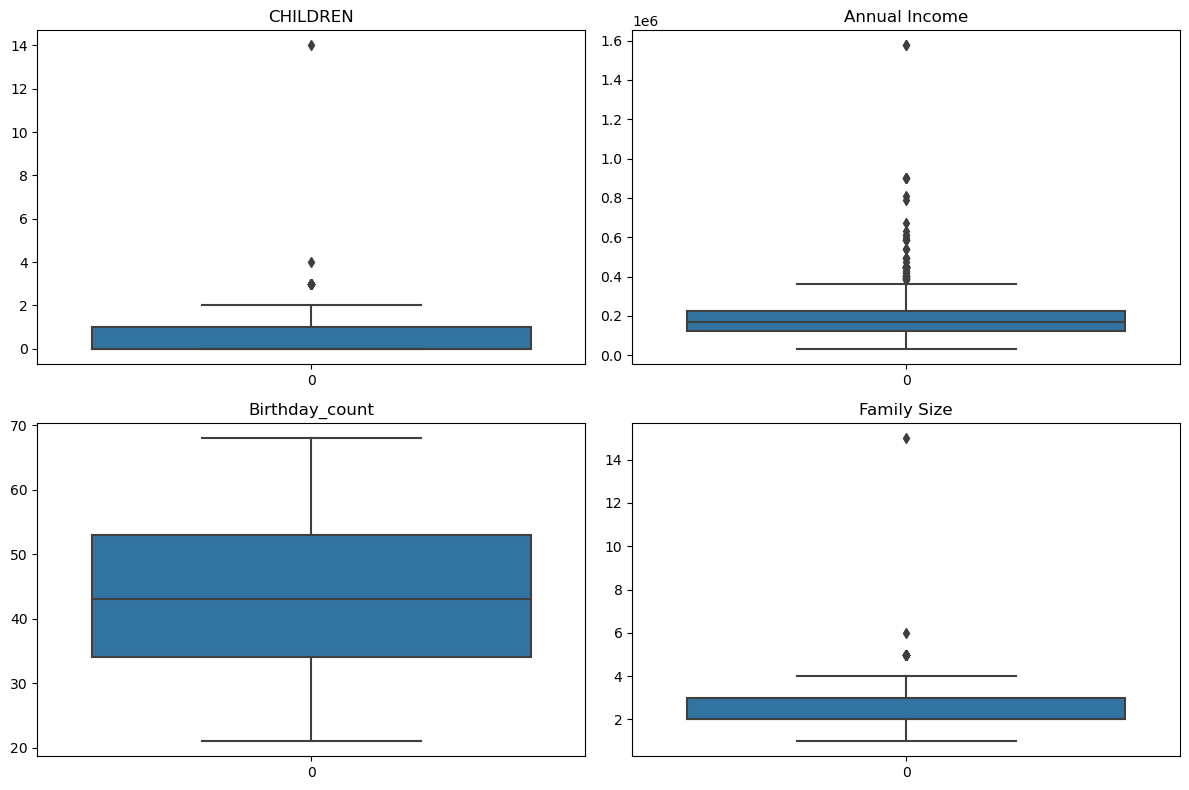

In [56]:
#Checking for all the outliers for continious variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

#Boxplot for 'children'
sns.boxplot(data=Credit_card['CHILDREN'], ax=axes[0, 0])
axes[0, 0].set_title('CHILDREN')

#Boxplot for 'annual_income'
sns.boxplot(data=Credit_card['Annual_income'], ax=axes[0, 1])
axes[0, 1].set_title('Annual Income')

#Boxplot for 'age'
sns.boxplot(data=Credit_card['Birthday_count'], ax=axes[1, 0])
axes[1, 0].set_title('Birthday_count')

#Boxplot for 'family_members'
sns.boxplot(data=Credit_card['Family_Members'], ax=axes[1, 1])
axes[1, 1].set_title('Family Size')

plt.tight_layout()
plt.show()

In [57]:
credit = Credit_card.rename(columns = {'Ind_ID' : 'id','GENDER' : 'gender', 'Car_Owner': 'car_owner', 'Propert_Owner' : 'property_owner',
                        'CHILDREN' : 'children', 'Annual_income' : 'annual_income' , 'Type_Income' : 'type_income',
                        'EDUCATION': 'education', 'Marital_status' : 'marital_status','Housing_type': 'housing_type',
                        'Birthday_count' : 'age', 'Employed_days' : 'employed_status', 'Type_Occupation' : 'type_occupation' ,
                        'Family_Members' : 'family_size' , 'label' : 'approval_status'})

Now that all the variables are in lowercase, which enhances readability and ease of use, also made there specific variable name changes:

"Birthday_count" has been renamed to "age."
"Employed_days" has been renamed to "employed_status."
"Family_members" has been renamed to "family_size"
These changes have been implemented for better clarity and understanding of the dataset.

In [58]:
#Dealing with outlier for 'children'
Q1 = np.percentile(credit['children'], 25, interpolation='midpoint')
Q3 = np.percentile(credit['children'], 75, interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
credit['children'] = credit['children'].clip(lower=0, upper=2)

#Dealing with outlier for 'family_members'
Q1 = np.percentile(credit['family_size'], 25, interpolation='midpoint')
Q3 = np.percentile(credit['family_size'], 75, interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
credit['family_size'] = credit['family_size'].clip(lower=0, upper=4)

#Dealing with outlier for 'annual_income'
Q1 = np.percentile(credit['annual_income'], 25, interpolation='midpoint')
Q3 = np.percentile(credit['annual_income'], 75, interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
credit['annual_income'] = np.where(
    (credit['annual_income'] < low_lim) | (credit['annual_income'] > up_lim),
    up_lim,
    credit['annual_income'])
credit['annual_income'] = credit['annual_income'].astype(int)

I have removed all outliers from the "Children," "Family Size," and "Annual Income" columns in your dataset. This action can help ensure that your data is more representative and suitable for analysis or modeling.

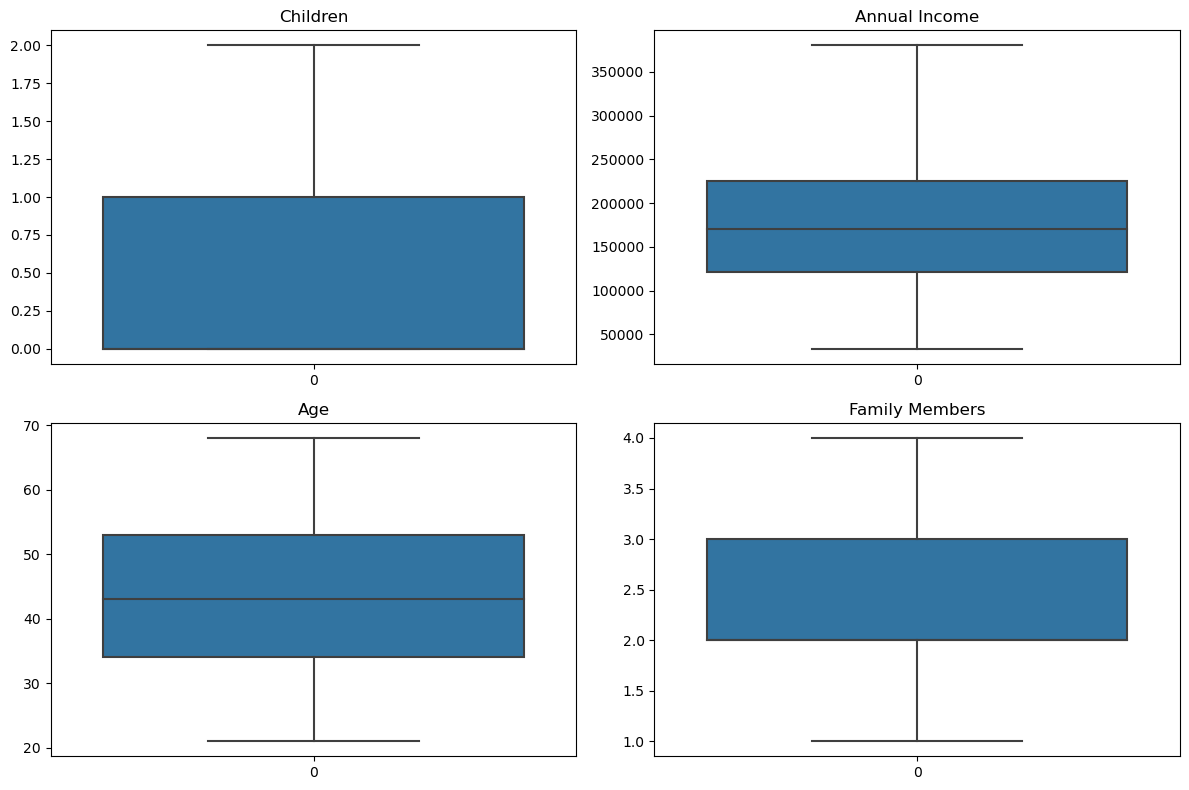

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

#Boxplot for 'children'
sns.boxplot(data=credit['children'], ax=axes[0, 0])
axes[0, 0].set_title('Children')

#Boxplot for 'annual_income'
sns.boxplot(data=credit['annual_income'], ax=axes[0, 1])
axes[0, 1].set_title('Annual Income')

#Boxplot for 'age'
sns.boxplot(data=credit['age'], ax=axes[1, 0])
axes[1, 0].set_title('Age')

#Boxplot for 'family_members'
sns.boxplot(data=credit['family_size'], ax=axes[1, 1])
axes[1, 1].set_title('Family Members')

plt.tight_layout()
plt.show()

In [60]:
credit.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1548.0,NaN,NaN,NaN,5078920.351421,41717.587742,5008827.0,5045069.75,5078841.5,5115673.0,5150412.0
gender,1541,2,F,973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_owner,1548,2,N,924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_owner,1548,2,Y,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
children,1548.0,NaN,NaN,NaN,0.393411,0.659774,0.0,0.0,0.0,1.0,2.0
annual_income,1548.0,NaN,NaN,NaN,184537.402455,82237.507253,33750.0,121500.0,171000.0,225000.0,380250.0
type_income,1548,4,Working,798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,1548,5,Secondary education,1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,1548,4,Married,1150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing_type,1548,6,House / apartment,1380,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df = credit['approval_status'].replace({0 : 'Approved', 1 : 'Not Approved'}).value_counts()
print("Approval Status Total Counts:")
print(df)

# Visualizing the total approved and not approved applicants

approval_labels = credit['approval_status'].value_counts().keys().tolist()
approval_values = credit['approval_status'].value_counts().values.tolist()
custom_legends = ['Approved', 'Not-Approved']  # Custom legends for 0 and 1
plot_data = [go.Pie(labels=approval_labels,
                    values=approval_values,
                    marker=dict(colors=['lightblue','orange'], line=dict(color="black",width=1.5)),
                    rotation=90,
                    hoverinfo="label+value+text",
                    hole= 0.5,
                    text= custom_legends)]

fig = go.Figure(data=plot_data)
po.iplot(fig)

Approval Status Total Counts:
Approved        1373
Not Approved     175
Name: approval_status, dtype: int64


It is evident from the dataset that approximately 89% of the candidates who applied for the credit card were granted approval, while the remaining 11% did not receive approval.

-------------------------------
Employed status and approval Status:
approval_status     0    1   All
employed_status                 
Employed         1147  140  1287
Unemployed        226   35   261
All              1373  175  1548
-------------------------------



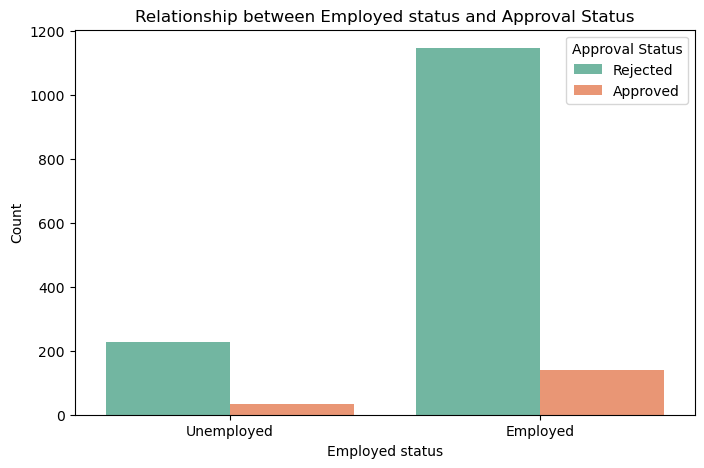

In [83]:
# Visualizing the employment status with respect to approval status

employed_approval = pd.crosstab(credit['employed_status'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Employed status and approval Status:")
print(employed_approval)
print("-------------------------------\n")
plt.figure(figsize=(8,5))
sns.countplot(data=credit, x='employed_status',  hue='approval_status', palette='Set2')
plt.title("Relationship between Employed status and Approval Status")
plt.xlabel("Employed status")
plt.ylabel("Count")
plt.legend(title='Approval Status', labels=['Rejected', 'Approved'])
plt.xticks(rotation=0)
plt.show()

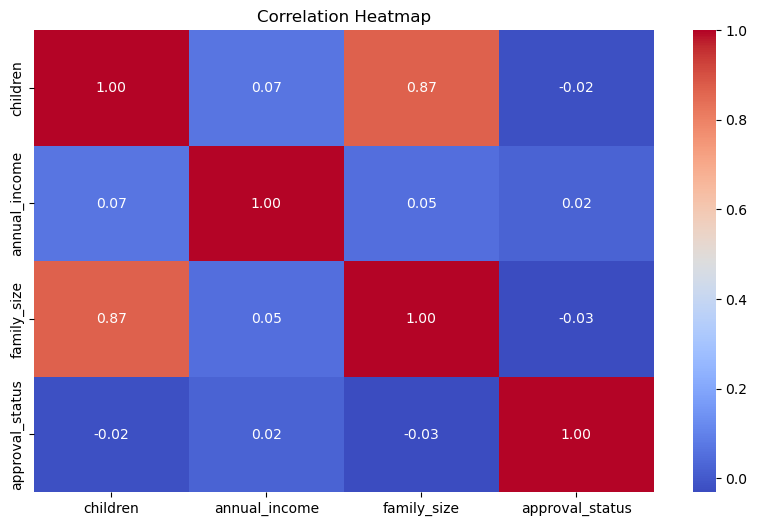

In [84]:
# Creating Heatmap to Visualize the relationship

correlation_columns = ['children', 'annual_income', 'family_size', 'approval_status']
correlation_df = credit[correlation_columns]
correlation_matrix = correlation_df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

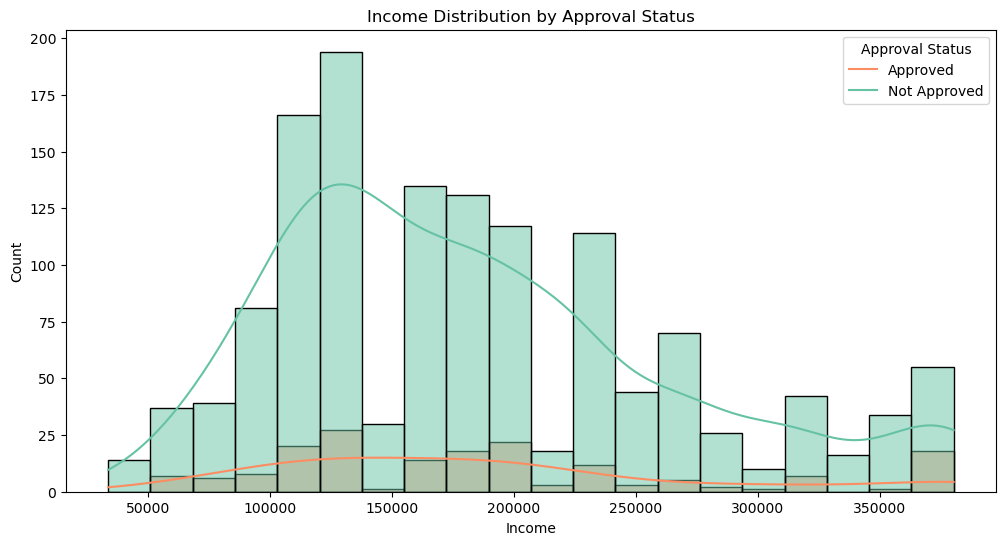

In [69]:
# Visualizing the income distribution

plt.figure(figsize=(12, 6))
sns.histplot(data=credit, x='annual_income', bins=20, kde=True, hue='approval_status', palette='Set2')
plt.title('Income Distribution by Approval Status')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Approved', 'Not Approved'])
plt.show()

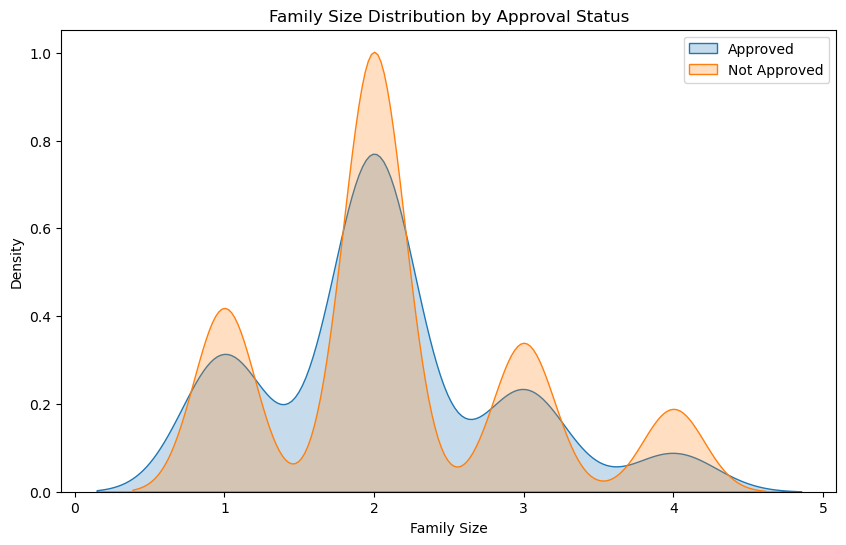

In [85]:
# Visualizing the Family size distribution by approval status

approved_family_size = credit[credit['approval_status'] == 1]['family_size']
not_approved_family_size = credit[credit['approval_status'] == 0]['family_size']
plt.figure(figsize=(10, 6))
sns.kdeplot(approved_family_size, label='Approved', shade=True)
sns.kdeplot(not_approved_family_size, label='Not Approved', shade=True)
plt.title('Family Size Distribution by Approval Status')
plt.xlabel('Family Size')
plt.ylabel('Density')
plt.legend()
plt.show()

-------------------------------
Children and approval Status:
approval_status     0    1   All
children                        
0                 965  126  1091
1                 269   36   305
2                 139   13   152
All              1373  175  1548
-------------------------------



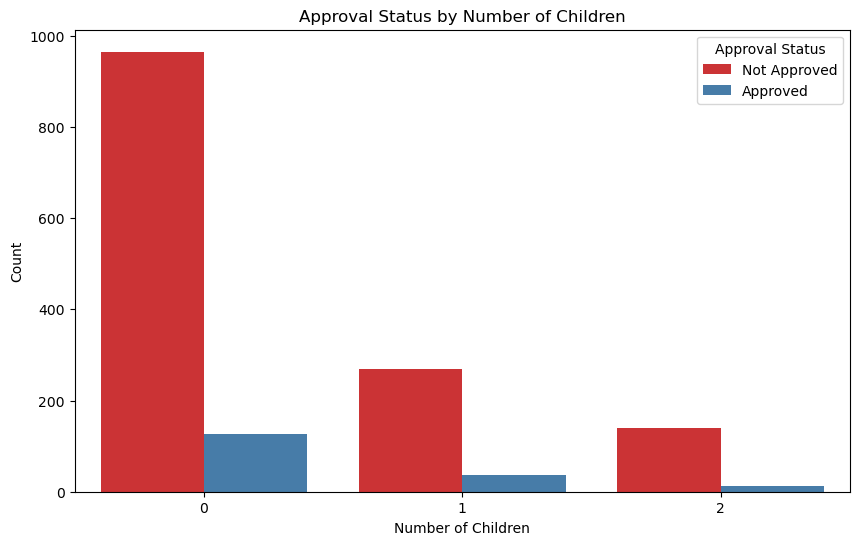

In [86]:
# Visualizing relationship between Children and Approval Status
children_approval = pd.crosstab(credit['children'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Children and approval Status:")
print(children_approval)
print("-------------------------------\n")
plt.figure(figsize=(10, 6))
sns.countplot(x='children', hue='approval_status', data=credit, palette='Set1')
plt.title('Approval Status by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])
plt.show()

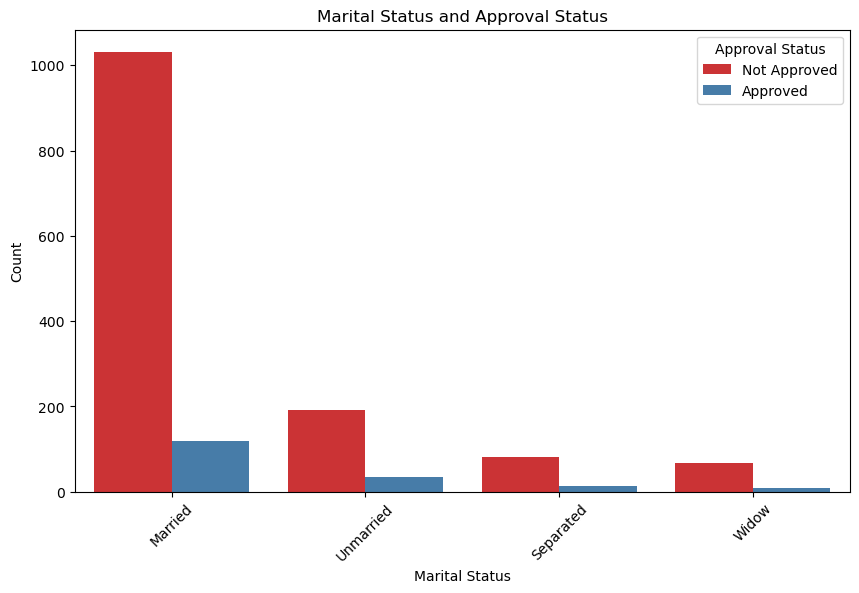

In [87]:
# Visualizing relationship between Marital Status and Approval Status

plt.figure(figsize=(10, 6))
sns.countplot(x='marital_status', hue='approval_status', data=credit, palette='Set1')
plt.title('Marital Status and Approval Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])
plt.xticks(rotation=45)
plt.show()

-------------------------------
Car Owners and approval Status:
approval_status     0    1   All
car_owner                       
N                 816  108   924
Y                 557   67   624
All              1373  175  1548
-------------------------------



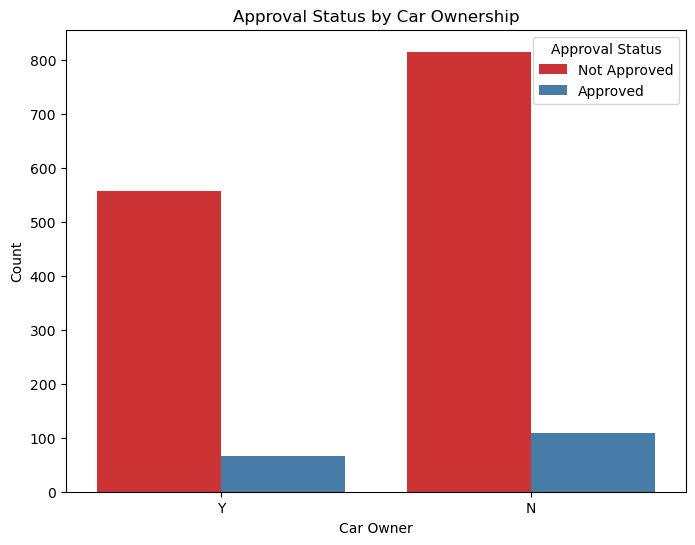

In [88]:
# Visualizing relationship between Car Owners and Approval Status

car_approval = pd.crosstab(credit['car_owner'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Car Owners and approval Status:")
print(car_approval)
print("-------------------------------\n")
plt.figure(figsize=(8, 6))
sns.countplot(x='car_owner', hue='approval_status', data=credit, palette='Set1')
plt.title('Approval Status by Car Ownership')
plt.xlabel('Car Owner')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])
plt.show()

-------------------------------
Property Owner and approval Status:
approval_status     0    1   All
property_owner                  
N                 473   65   538
Y                 900  110  1010
All              1373  175  1548
-------------------------------



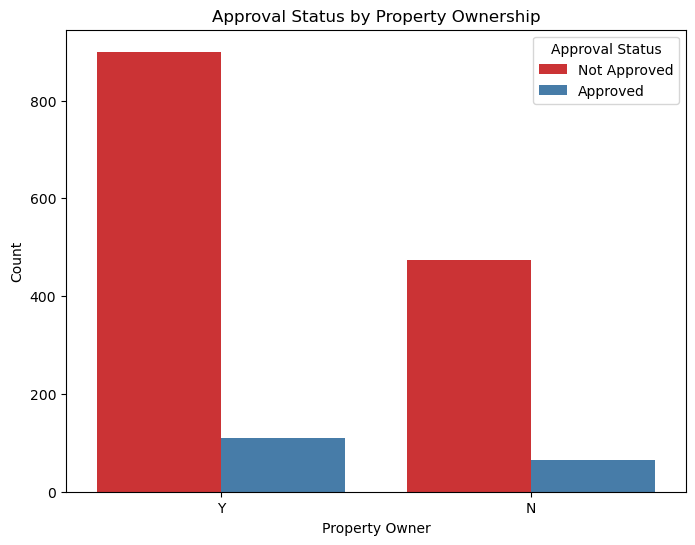

In [89]:
# Visualizing relationship between Property Owners and Approval Status
property_approval = pd.crosstab(credit['property_owner'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Property Owner and approval Status:")
print(property_approval)
print("-------------------------------\n")
plt.figure(figsize=(8, 6))
sns.countplot(x='property_owner', hue='approval_status', data=credit, palette='Set1')
plt.title('Approval Status by Property Ownership')
plt.xlabel('Property Owner')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])
plt.show()

-------------------------------
Income Type and approval Status:
approval_status          0    1   All
type_income                          
Commercial associate   315   50   365
Pensioner              227   42   269
State servant          110    6   116
Working                721   77   798
All                   1373  175  1548
-------------------------------



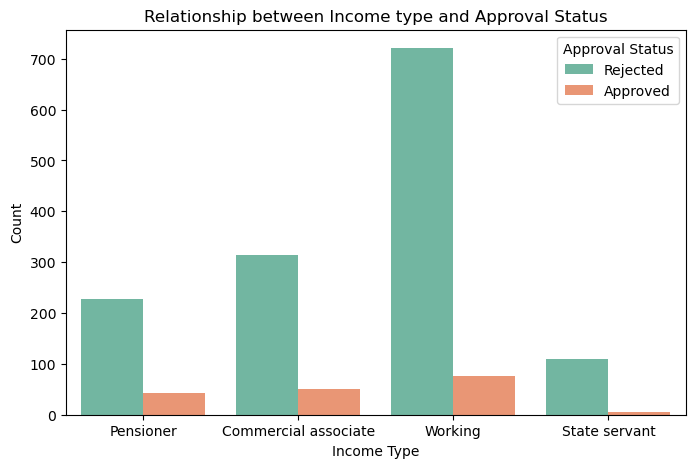

In [90]:
# Visualizing Relationship between Income Type and Approval Status
income_approval = pd.crosstab(credit['type_income'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Income Type and approval Status:")
print(income_approval)
print("-------------------------------\n")
plt.figure(figsize=(8,5))
sns.countplot(data=credit, x='type_income',  hue='approval_status', palette='Set2')
plt.title("Relationship between Income type and Approval Status")
plt.xlabel("Income Type")
plt.ylabel("Count")
plt.legend(title='Approval Status', labels=['Rejected', 'Approved'])
plt.xticks(rotation=0)
plt.show()

-------------------------------
Education and approval Status:
approval_status         0    1   All
education                           
Academic degree         2    0     2
Higher education      371   55   426
Incomplete higher      63    5    68
Lower secondary        15    6    21
Secondary education   922  109  1031
All                  1373  175  1548
-------------------------------



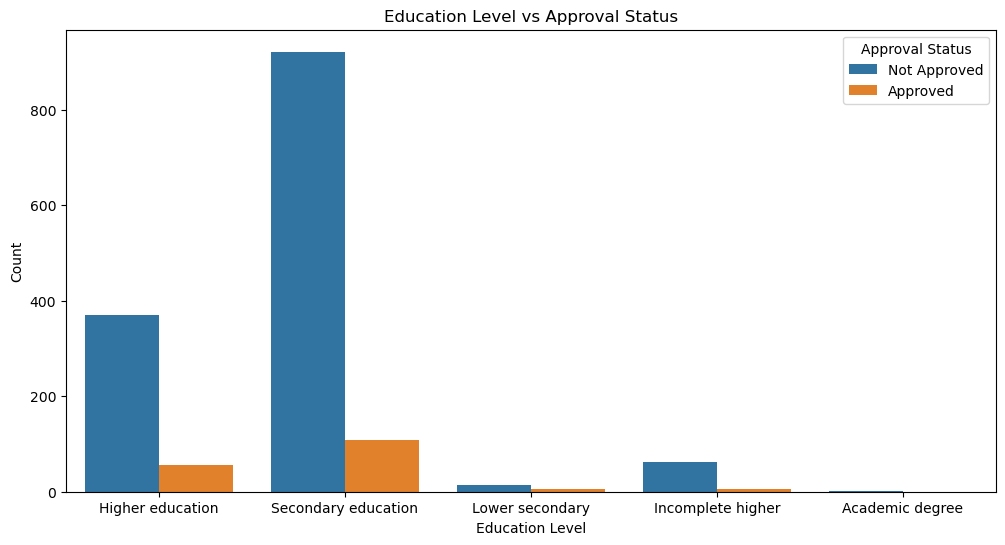

In [91]:
# Relationship between Education Level and Approval Status
education_approval = pd.crosstab(credit['education'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Education and approval Status:")
print(education_approval)
print("-------------------------------\n")
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='approval_status', data=credit)
plt.title('Education Level vs Approval Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])
plt.show()

-------------------------------
Housing type and approval Status:
approval_status         0    1   All
housing_type                        
Co-op apartment         3    2     5
House / apartment    1234  146  1380
Municipal apartment    37   16    53
Office apartment        7    2     9
Rented apartment       17    4    21
With parents           75    5    80
All                  1373  175  1548
-------------------------------



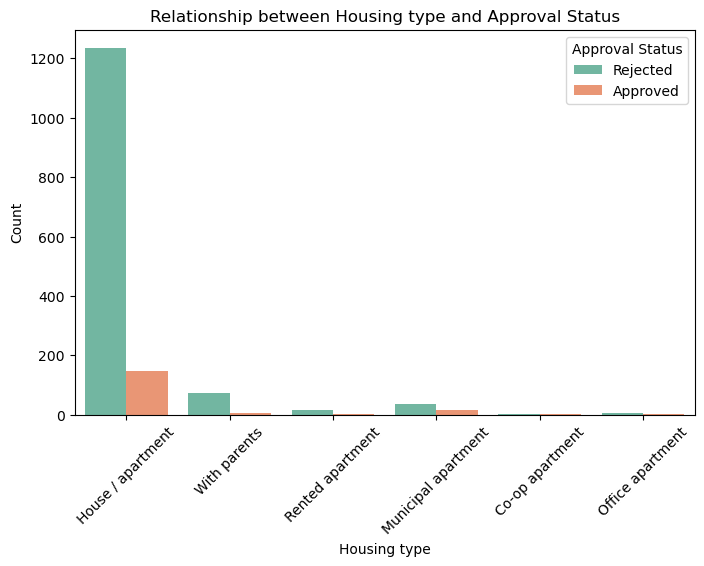

In [92]:
# Relationship between Housing Type and Approval Status
housing_approval = pd.crosstab(credit['housing_type'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Housing type and approval Status:")
print(housing_approval)
print("-------------------------------\n")
plt.figure(figsize=(8,5))
sns.countplot(data=credit, x='housing_type',  hue='approval_status', palette='Set2')
plt.title("Relationship between Housing type and Approval Status")
plt.xlabel("Housing type")
plt.ylabel("Count")
plt.legend(title='Approval Status', labels=['Rejected', 'Approved'])
plt.xticks(rotation=45)
plt.show()

In [93]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               1548 non-null   int64   
 1   gender           1541 non-null   object  
 2   car_owner        1548 non-null   object  
 3   property_owner   1548 non-null   object  
 4   children         1548 non-null   int64   
 5   annual_income    1548 non-null   int32   
 6   type_income      1548 non-null   object  
 7   education        1548 non-null   object  
 8   marital_status   1548 non-null   object  
 9   housing_type     1548 non-null   object  
 10  age              1548 non-null   category
 11  employed_status  1548 non-null   object  
 12  family_size      1548 non-null   int64   
 13  approval_status  1548 non-null   int64   
dtypes: category(1), int32(1), int64(4), object(8)
memory usage: 197.3+ KB


In [95]:
X = credit.iloc[:, :-1]

In [96]:
X.drop(columns=['id','type_income'], inplace=True, axis=1) # These variables are not necessary

In [97]:
categorical_columns = [0, 1, 2, 5, 6, 7, 8, 9]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, ..., 0.00e+00, 1.80e+05, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 3.15e+05, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 3.15e+05, 2.00e+00],
       ...,
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 2.00e+00, 1.80e+05, 4.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 0.00e+00, 2.70e+05, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 2.25e+05, 2.00e+00]])

In [98]:
y = credit.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
1543    0
1544    0
1545    0
1546    0
1547    0
Name: approval_status, Length: 1548, dtype: int64

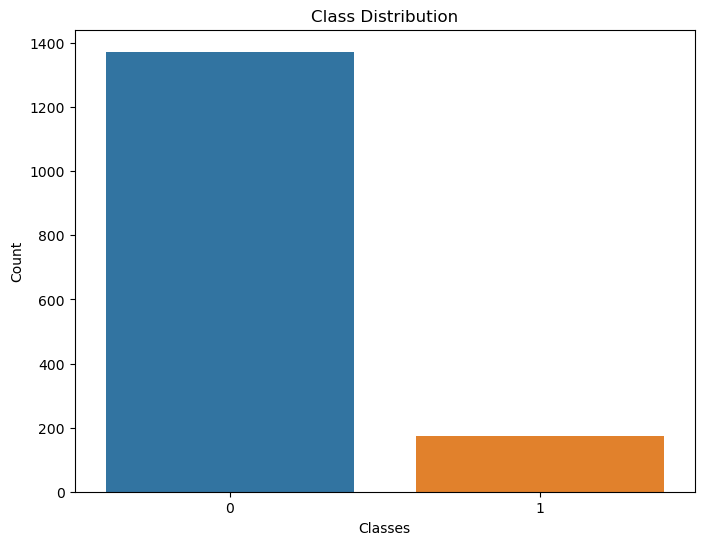

0    1373
1     175
Name: approval_status, dtype: int64


In [99]:
# Count the occurrences of each class
class_distribution = y.value_counts()
# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()
print(class_distribution)

In [100]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X, y = oversampler.fit_resample(X, y)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [103]:
print(X_train.shape)
print(X_test.shape)

(2196, 32)
(550, 32)


In [104]:
cc_train = X_train.copy()
cc_train

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 2.250e+05,
        2.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.350e+05,
        1.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.000e+00, 1.035e+05,
        3.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 2.520e+05,
        2.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.575e+05,
        2.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 2.025e+05,
        1.000e+00]])

In [105]:
cc_test = X_test.copy()
cc_test

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.45000e+04, 2.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.35000e+05, 3.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.91399e+05, 1.00000e+00],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.25000e+05, 2.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.35000e+05, 2.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.02500e+05, 2.00000e+00]])

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[:,:] = sc.fit_transform(X_train[:,:])

X_test[:,:] = sc.transform(X_test[:,:])

In [107]:
X_train

array([[ 0.83411803, -0.80846426, -0.12351756, ...,  0.93870609,
         0.43227147, -0.1571032 ],
       [ 0.83411803, -0.80846426, -0.12351756, ..., -0.60079994,
        -0.60929277, -1.3508701 ],
       [-1.19887109,  1.23691306, -0.12351756, ...,  0.93870609,
        -0.97384025,  1.0366637 ],
       ...,
       [ 0.83411803, -0.80846426, -0.12351756, ...,  0.93870609,
         0.74474074, -0.1571032 ],
       [ 0.83411803, -0.80846426, -0.12351756, ..., -0.60079994,
        -0.34890171, -0.1571032 ],
       [-1.19887109,  1.23691306, -0.12351756, ..., -0.60079994,
         0.17188041, -1.3508701 ]])

In [108]:
X_test

array([[ 0.83411803, -0.80846426, -0.12351756, ..., -0.60079994,
        -1.07799667, -0.1571032 ],
       [-1.19887109,  1.23691306, -0.12351756, ...,  0.93870609,
        -0.60929277,  1.0366637 ],
       [ 0.83411803, -0.80846426, -0.12351756, ..., -0.60079994,
         0.04340925, -1.3508701 ],
       ...,
       [-1.19887109,  1.23691306, -0.12351756, ..., -0.60079994,
         0.43227147, -0.1571032 ],
       [ 0.83411803, -0.80846426, -0.12351756, ..., -0.60079994,
        -0.60929277, -0.1571032 ],
       [-1.19887109,  1.23691306, -0.12351756, ..., -0.60079994,
         0.17188041, -0.1571032 ]])

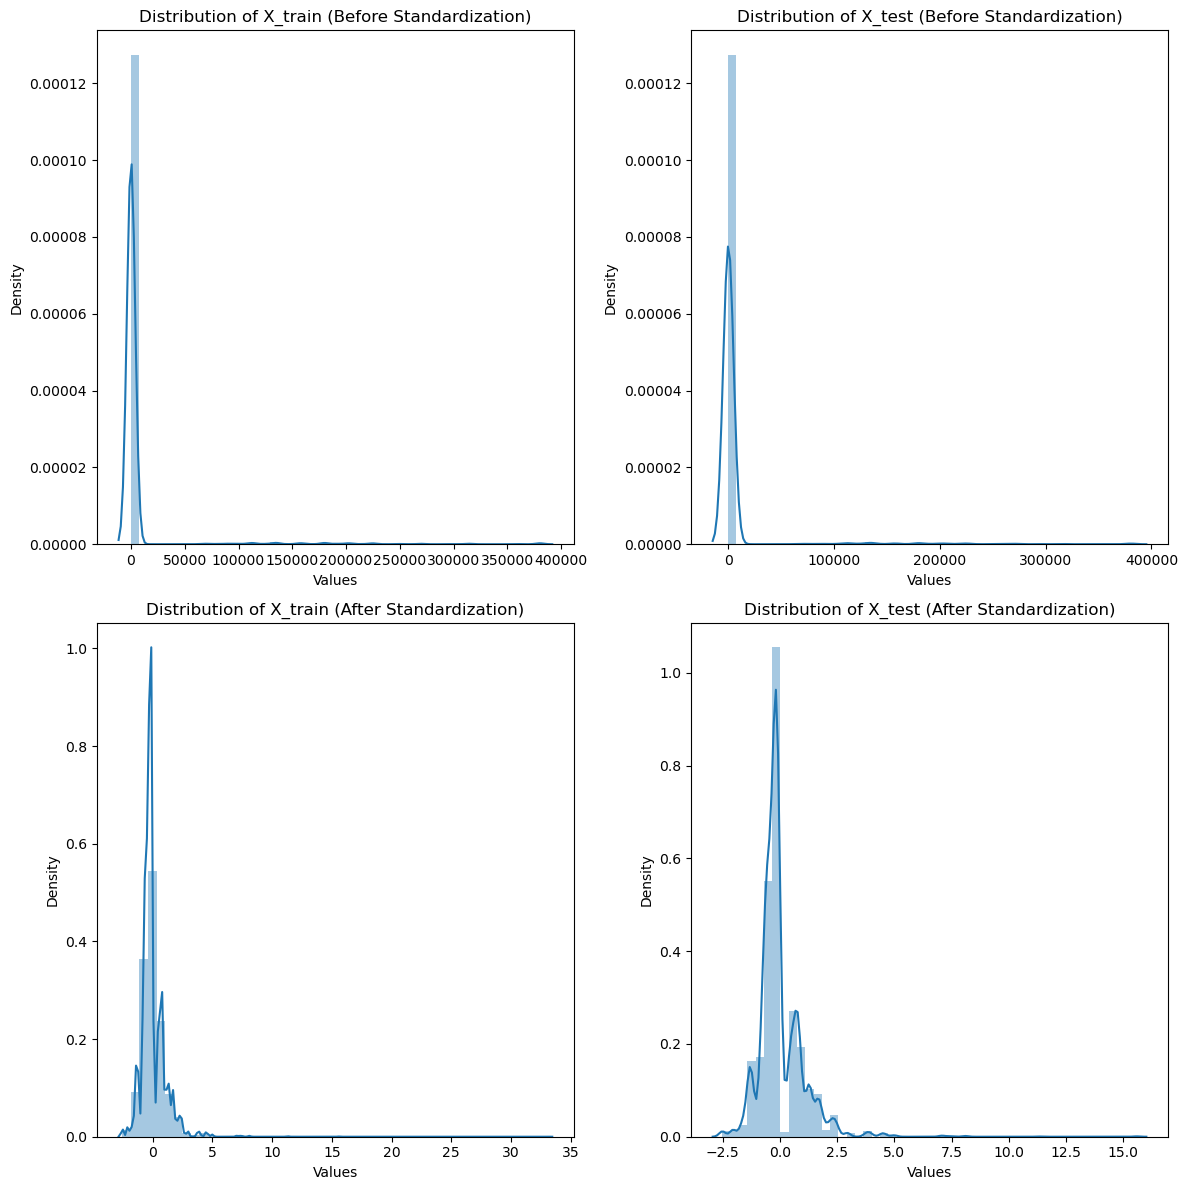

In [109]:
# Create a figure with two rows and two columns
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Before Standardization: Plot the distribution of X_train
sns.distplot(cc_train, kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Values')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('Distribution of X_train (Before Standardization)')

# Before Standardization: Plot the distribution of X_test
sns.distplot(cc_test, kde=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('Values')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Distribution of X_test (Before Standardization)')

# After Standardization: Plot the distribution of X_train
sns.distplot(X_train, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Values')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Distribution of X_train (After Standardization)')

# After Standardization: Plot the distribution of X_test
sns.distplot(X_test, kde=True, ax=axes[1, 1])
axes[1, 1].set_xlabel('Values')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Distribution of X_test (After Standardization)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [110]:
# Create a Logistic Regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print(f'Accuracy Score : {accuracy}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report :\n {class_report}')

Accuracy Score : 62.91
Classification Report :
               precision    recall  f1-score   support

           0       0.61      0.72      0.66       277
           1       0.65      0.54      0.59       273

    accuracy                           0.63       550
   macro avg       0.63      0.63      0.63       550
weighted avg       0.63      0.63      0.63       550



In [111]:
# Define the hyperparameter grid to search for logistic regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga']}

grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_
print(best_params_lr)
print(best_model_lr)

{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=0.01)


In [112]:
lr_mod_best = LogisticRegression(C=10, penalty='l2', solver='liblinear')
lr_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_lr = lr_mod_best.predict(X_test)
class_report_lr_best = classification_report(y_test, y_pred_best_lr)
print(f'Classification Report :\n {class_report_lr_best}')

Classification Report :
               precision    recall  f1-score   support

           0       0.61      0.72      0.66       277
           1       0.65      0.54      0.59       273

    accuracy                           0.63       550
   macro avg       0.63      0.63      0.63       550
weighted avg       0.63      0.63      0.63       550



In [113]:
lrmodel_accuracy = round(accuracy_score(y_test, y_pred_best_lr)*100, 2)
print(f'Accuracy Score after tuning : {lrmodel_accuracy}')

Accuracy Score after tuning : 62.91


In [115]:
# Create a DecisionTree Model
dt = DecisionTreeClassifier()

# Train the model on the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print(f'Accuracy Score : {accuracy}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report :\n {class_report}')


Accuracy Score : 96.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       277
           1       0.93      1.00      0.96       273

    accuracy                           0.96       550
   macro avg       0.96      0.96      0.96       550
weighted avg       0.96      0.96      0.96       550



In [116]:
# Define the hyperparameter grid to search for decision tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)

grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_
print(best_params_dt)
print(best_model_dt)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier()


In [117]:
dt_mod_best = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 1, min_samples_split = 2)
dt_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_dt = dt_mod_best.predict(X_test)
class_report_dt_best = classification_report(y_test, y_pred_best_dt)
print(f'Classification Report :\n {class_report_dt_best}')

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       277
           1       0.89      1.00      0.94       273

    accuracy                           0.94       550
   macro avg       0.95      0.94      0.94       550
weighted avg       0.95      0.94      0.94       550



In [118]:
dtmodel_accuracy = round(accuracy_score(y_test, y_pred_best_dt)*100, 2)
print(f'Accuracy Score after tuning : {dtmodel_accuracy}')

Accuracy Score after tuning : 94.0


In [119]:
# Create a Logistic Random Forest
rf = RandomForestClassifier(random_state = 42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print(f'Accuracy Score: {accuracy}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report :\n {class_report}')

Accuracy Score: 97.09
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       277
           1       0.94      1.00      0.97       273

    accuracy                           0.97       550
   macro avg       0.97      0.97      0.97       550
weighted avg       0.97      0.97      0.97       550



In [ ]:
# Define the hyperparameter grid to search for random forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
print(best_params_rf)
print(best_model_rf)

In [121]:
rf_mod_best = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 1, min_samples_split=2, n_estimators=100, random_state=42)
rf_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_rf = rf_mod_best.predict(X_test)
class_report_rf_best = classification_report(y_test, y_pred_best_rf)
print(f'Classification Report :\n {class_report_rf_best}')

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       277
           1       0.94      1.00      0.97       273

    accuracy                           0.97       550
   macro avg       0.97      0.97      0.97       550
weighted avg       0.97      0.97      0.97       550



In [ ]:
rfmodel_accuracy = round(accuracy_score(y_test, y_pred_best_rf)*100, 2)
print(f'Accuracy Score after tuning : {rfmodel_accuracy}')

In [ ]:
# Create a Support Vector Machine (SVM)
svm = SVC()

# Train the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print(f'Accuracy Score: {accuracy}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report :\n {class_report}')

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]}

# Create the GridSearchCV object
grid_search_svc = GridSearchCV(svm, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

best_params_svc = grid_search_svc.best_params_
best_model_svc= SVC(**best_params_svc)
print(best_model_svc)

## Model Comparison

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracy_scores = [lrmodel_accuracy, dtmodel_accuracy, rfmodel_accuracy, svcmodel_accuracy]

trace = go.Bar(
    x=models,
    y=accuracy_scores,
    text=[f'{score}%' for score in accuracy_scores],
    marker=dict(color='lightblue', line=dict(color='black', width=1.5)),
)

data = [trace]

layout = go.Layout(
    title='Comparison of Model Performance Metrics',
    xaxis=dict(title='Models'),
    yaxis=dict(title='Scores'),
)

fig = go.Figure(data=data, layout=layout)


pyo.iplot(fig)

#Model comparison DataFrame
accuracy_scores_with_percent = [f'{score}%' for score in accuracy_scores]
model_comparison_df = pd.DataFrame({'Model_Name': models, 'Accuracy Score': accuracy_scores_with_percent})
model_comparison_df = model_comparison_df.sort_values(by='Accuracy Score', ascending=False)
model_comparison_df.reset_index(drop=True, inplace=True)
print(model_comparison_df)